In [3]:
rm(list=ls())
setwd("D:/2019 Fall/STAT 628/module 2")
data = read.csv("BODYFAT.csv")[,-1]
library(car)

Loading required package: carData


### Check missing values

In [4]:
max(is.na(data))

[1] 0

As the command returns a 0, there is no misiing value in this data set.

### Visualization of target vectors

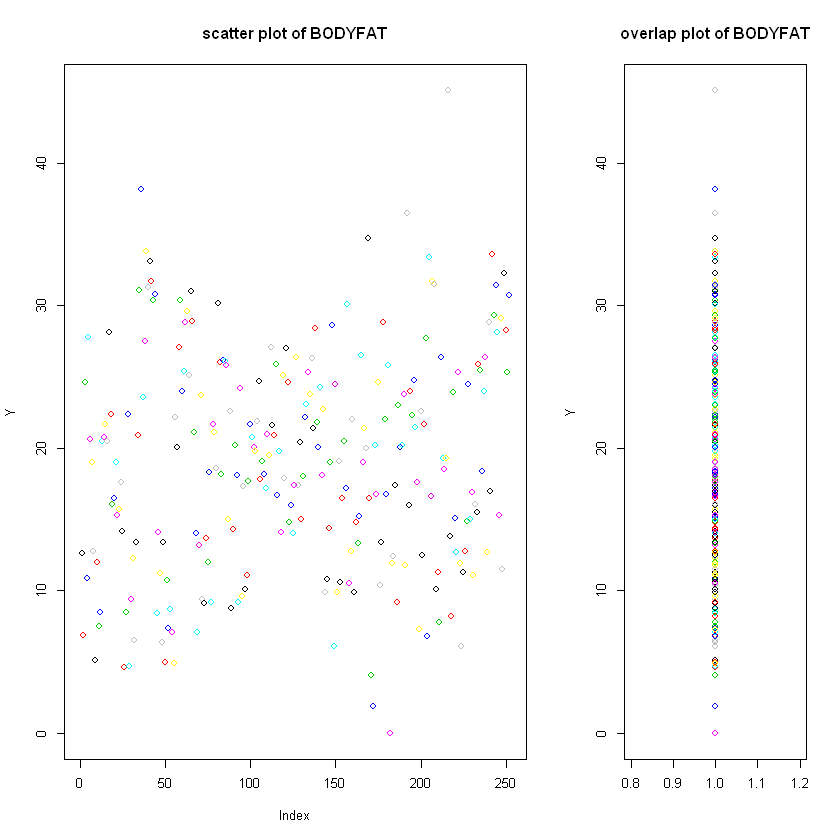

In [14]:
Y = data$BODYFAT
mat = matrix(c(1,1,2),nrow=1)
layout(mat)
plot(data$BODYFAT,col=1:n,ylab="Y",main="scatter plot of BODYFAT")
plot(rep(1,n),data$BODYFAT,col=1:n,xlab="",ylab="Y",main="overlap plot of BODYFAT",xlim=c(0.8,1.2))

From pictures above, the target vector can be considered as a continuous variable.

Consider a linear reression model in this case. 

### A brief review of data

Firstly, we use boxplot to see if extreme values are outliers.

Here we just show columns who has values taken into conideration.

Sencondly, according to current researches, the equation holds:
$$bodyfat = \frac{495}{density}-450$$
$$bmi = \frac{weight_{lb}}{height^2_{in}}*703$$
We use the 1st equation to find potential outliers.

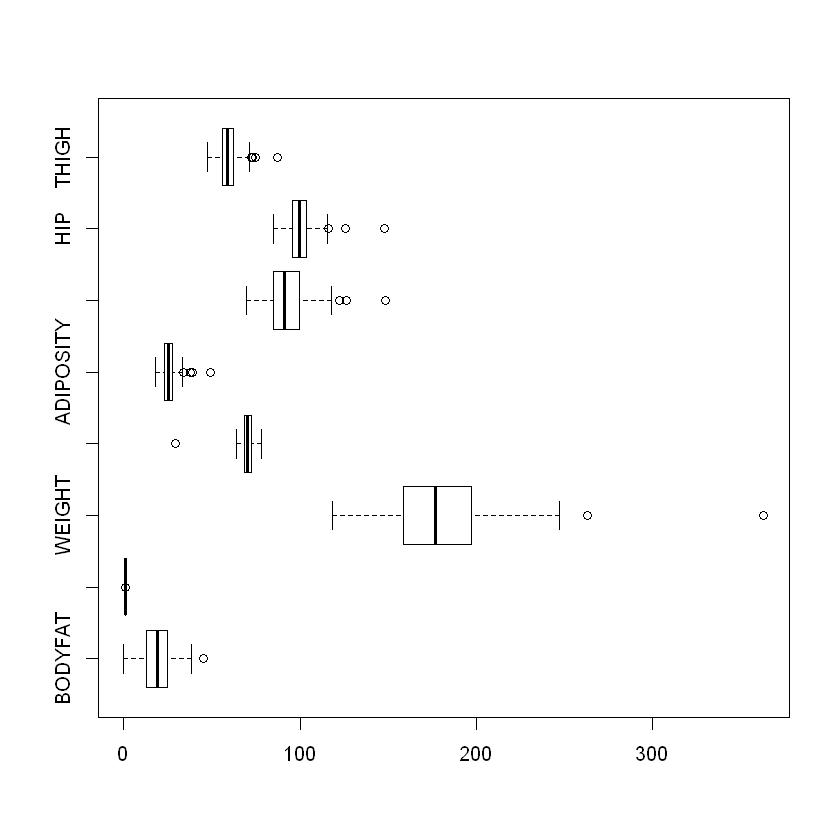

In [7]:
boxplot(data[,c("BODYFAT","DENSITY","WEIGHT","HEIGHT","ADIPOSITY","ABDOMEN",
                "HIP","THIGH")],horizontal=T)
ind = sort(unique(c(which.max(data$BODYFAT),which.min(data$DENSITY),
                    which.max(data$WEIGHT),which.min(data$HEIGHT),
                    which.min(data$ADIPOSITY),which.max(data$ABDOMEN),
                    which.max(data$HIP),which.max(data$THIGH))))

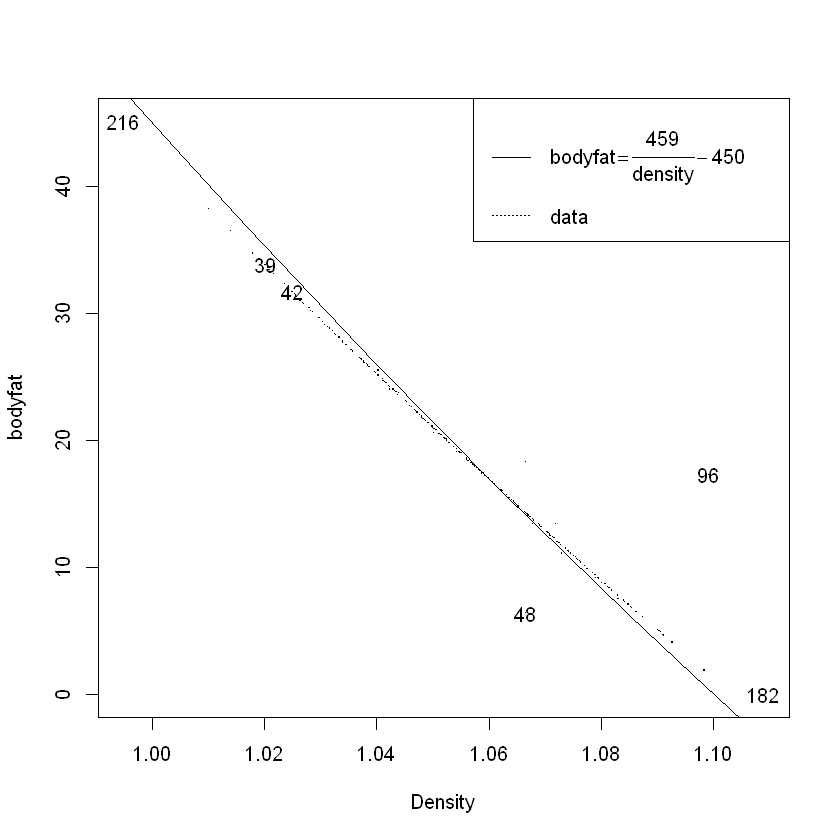

In [17]:
rank.ind = which(rank(data$DENSITY)%in%c(1,174,251,252))
index = sort(unique(c(rank.ind,ind)))
plot(data$DENSITY,data$BODYFAT,pch=".",xlab="Density",ylab="bodyfat")
text(data$DENSITY[index],data$BODYFAT[index],labels=as.character(index))
curve(expr = 495/x-450,0,1.13,add=T)
legend("topright",legend=c(expression(bodyfat==frac(459,density)-450),"data"),
       lty=c("solid","dotted"))

In the above plot, we show the pitential outliers in the same picture.

In [22]:
data[index,]
data[90,]
data$BODYFAT[48] = 496/dens=data$DENSITY[48]-450

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
48,6.4,1.0665,39,148.50,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9
96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
216,45.1,0.9950,51,219.00,64.00,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
90,14.3,1.0666,48,176,73,23.3,36.7,96.7,86.5,98.3,60.4,39.9,24.4,28.8,29.6,18.7


Keep data 39, 42 and 96 in the later analysis.

Delete data 182 and 216 as the abnormal values cannot be modified by euqations above.

Data 90 is very similar to 48, thus, modify the bodyfat value of 48 by applying the equation $bodyfat = \frac{495}{density}-450$

### Outliers detection

From an original linear regression model, use three methods below for testing outliers together:

1. remove data points whose standardized residuals' absolute values are greater than 2.5;

2. remove data points with Cook's distances greater than $\frac{4}{n-p}$;

3. apply outlierTest function in the car package.

Stop detection when the outlierTest function returns no outliers under Bonferroni test..

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferroni p
224 -2.653188          0.0085245           NA

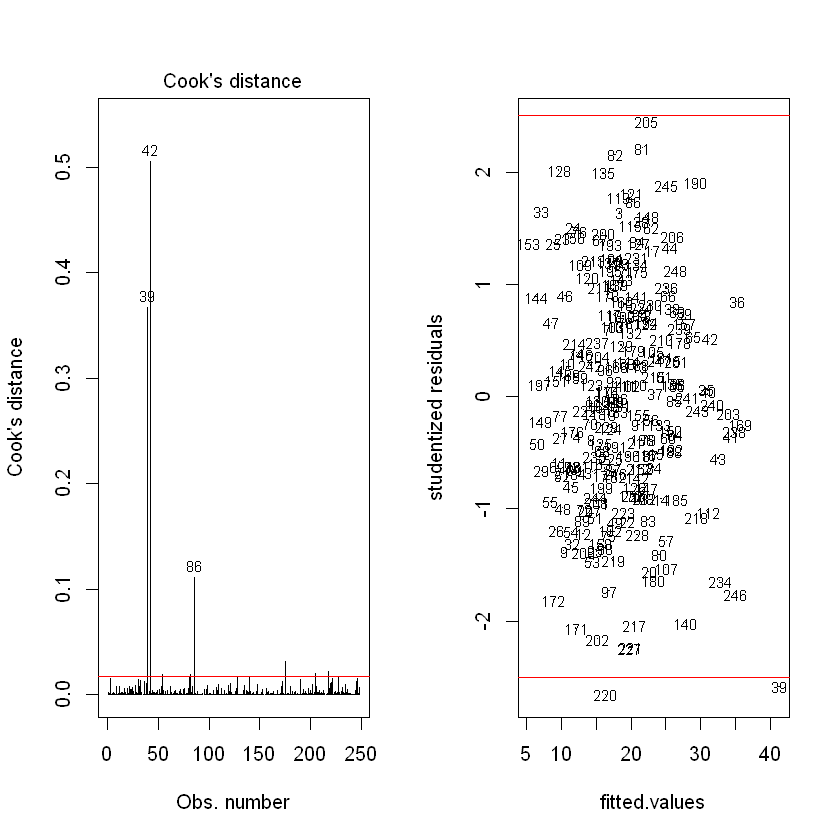

In [25]:
data = data[-c(182,216),]
m = lm(BODYFAT~.,data[,-2])
# test outliers 
plot.outlier=function(model,data){
  n = nrow(data)
  p = ncol(data)
  par(mfrow=c(1,2))
  plot(model,4)
  abline(h=4/(n-p),col="red")
  plot(x=model$fitted.values,y=rstudent(model),pch=".",
       xlab="fitted.values",ylab="studentized residuals")
  text(x=model$fitted.values,y=rstudent(model),labels=1:nrow(data),cex=0.75)
  abline(h=2.5,col="red")
  abline(h=-2.5,col="red")
  outlierTest(model)
}

plot.outlier(m,data)
par(mfrow=c(1,1))

We just remove data points with large Cook's distance or whose residuals are obviously far away from the red lines.

Let's have a look at those points closes to red lines.

It can be concluded from the table above, the suspicious outliers should not be removed as they are in the normal range of people health data.

In [26]:
ind = c(39,42,86,220)
data = data[-ind,]

In the progress above, 6 outliers are removed.

### Dimension of data

In [27]:
n = nrow(data); p = ncol(data[,-1])
cat("This data(X) is a ",n,"x",p," matrix.",sep="" )

This data(X) is a 244x15 matrix.

Write the new data into a csv file. (As we have done so, don't run the last cell.)

In [7]:
# write.csv(data,"data.cleaned.csv")